In [16]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.optimizers import Adadelta
#import keras

In [2]:
train = pd.read_csv('E:/MNIST/train.csv')
test = pd.read_csv('E:/MNIST/test.csv')

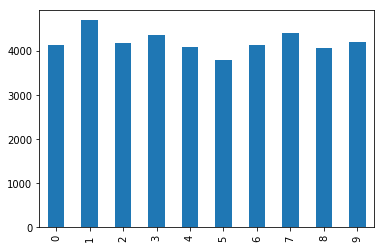

In [3]:
y_train = train['label']
X_train = train.drop('label', axis = 1)
#X_train = X_train.values.reshape(42000, 28, 28)

y_train.value_counts(sort = False).plot(kind = 'bar')
plt.show()

In [4]:
#print(X_train.isnull().sum().sum())
#print(y_train.isnull().sum())

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [5]:
y_train = to_categorical(y_train, num_classes = 10)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 1)

In [7]:
# Normalizing data
X_train = X_train / 255.0
X_val = X_val / 255.0

In [442]:
# Conv2D (32,3*3, relu, padding = valid, stides = 1), MaxPool2d(2,2), BatchNormalization, Dropout = 0.25
# Conv2D(64, 3*3, relu), MaxPool2D(2,2), BatchNormalization, Dropout = 0.25
# Flattten, Dense(128, relu), Dropout(0.3), Dense(10, softmax)
# 98.914

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
#model.add(MaxPool2D(strides = (2,2)))
#model.add(Dropout(0.4))

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool2D(strides = (2,2)))
#model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
#model.summary()

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', strides = 1, input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [24]:
model.compile(optimizer = keras.optimizers.Adadelta(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
early_stopping_monitor = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint('weights.hdf5', monitor = 'val_loss', save_best_only = True)
callbacks_list = [checkpoint, early_stopping_monitor]
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2, callbacks = callbacks_list, batch_size = 32)

Train on 28560 samples, validate on 7140 samples
Epoch 1/25
28560/28560 [==============================] - 84s 3ms/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0355 - val_acc: 0.9899
Epoch 2/25
28560/28560 [==============================] - 80s 3ms/step - loss: 0.0271 - acc: 0.9911 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 3/25
28560/28560 [==============================] - 77s 3ms/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0328 - val_acc: 0.9901
Epoch 4/25
28560/28560 [==============================] - 76s 3ms/step - loss: 0.0217 - acc: 0.9936 - val_loss: 0.0404 - val_acc: 0.9892
Epoch 5/25
28560/28560 [==============================] - 77s 3ms/step - loss: 0.0195 - acc: 0.9934 - val_loss: 0.0375 - val_acc: 0.9899
Epoch 6/25
28560/28560 [==============================] - 84s 3ms/step - loss: 0.0178 - acc: 0.9940 - val_loss: 0.0386 - val_acc: 0.9903


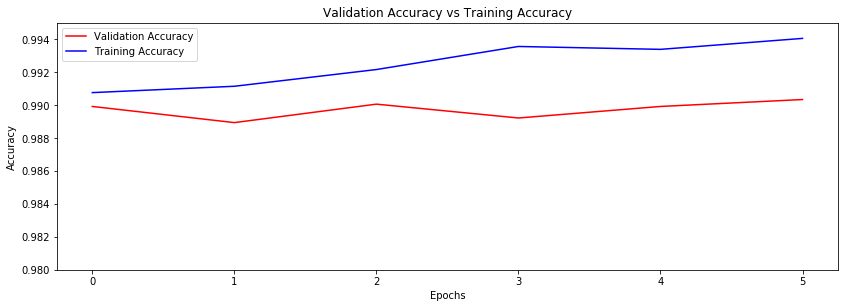

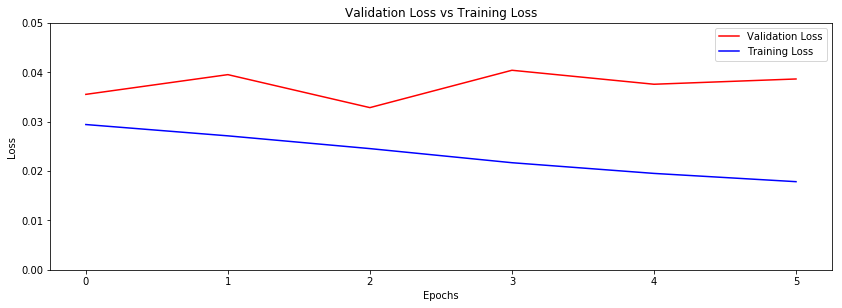

In [47]:
model_history = history.history
validation_accu = model_history['val_acc']
model_loss = model_history['loss']
validation_loss = model_history['val_loss']
model_accu = model_history['acc']
epochs = range(len(model_accu))

#plot for validation accuracy and Training Accuracy
plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs, validation_accu, 'r', label = 'Validation Accuracy')
plt.plot(epochs, model_accu, 'b', label = 'Training Accuracy')
plt.ylim([0.98,0.995])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()

#plot for validation loss and Training loss
plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs, validation_loss, 'r', label = 'Validation Loss')
plt.plot(epochs, model_loss, 'b', label = 'Training Loss')
plt.ylim([0,0.05])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Training Loss')
plt.legend()

plt.show()

In [44]:
model.load_weights('weights.hdf5')
preds = model.predict_classes(X_val)

In [45]:
count = 0
for i in range(len(y_val)):
    if preds[i] == pd.Series(y_val[i]).idxmax():
        count = count + 1
print('Testing Accuracy = ' + str(round(count / len(preds),4)*100) + ' %')

Testing Accuracy = 99.08 %


In [38]:
preds = model.predict_classes(test / 255.0)
index = []
for i in range(28000):
    index.append(i+1)
dict = {'ImageId': index, 'Label': preds}
df = pd.DataFrame(dict)
df.to_csv('MNISTpreds.csv', index = False)